In [122]:
import sys
import itertools


class IntcodeMachine:
    VERBOSE=True
    def __init__(self, data,first=False):
        self.memory = data
        self.pointer = 0
        self.size = len(data)
        self.out = 0
        self.halt = False
        self.initialized = False
        self.relBase = 0
        
        self.painted_x = dict()
        self.painted_y = dict()
        self.current_pos = [0,0]
        # do a self.direction%4
        # {0:up,1:right,2:down,3:left}
        
        self.direction = 0
        self.ticker = 0
        self.paint_history = []
        self.colour = 1
        self.first = first
        self.blocked = False
        self.results = set()
        self.direction = 0
        self.walls = set()
        self.runtime = 0

    def process(self, inputArg = None):
        if inputArg != None:  
            self.initialized = True
        
        while self.pointer < self.size:
            opcode = int(str(self.memory[self.pointer])[-2:])
            paramModes = str(self.memory[self.pointer])[:-2]
            if self.halt:
                print('found 2!')
                break
            if self.runtime >100000:
                print('timedout after N')
                break
            if (opcode == 99): # HALT
                self.halt = True
                print('halt')
                break
            elif (opcode == 1): # OPCODE 01 - Sum
                self.__setParam(paramModes, 3, self.__getParam(paramModes,1) + self.__getParam(paramModes,2))
                self.pointer += 4
            elif (opcode == 2): # OPCODE 02 - Multiply
                self.__setParam(paramModes, 3, self.__getParam(paramModes,1) * self.__getParam(paramModes,2))
                self.pointer += 4
            elif (opcode == 3):  # OPCODE 03 - Input
                if inputArg != None:
                    self.__setParam(paramModes, 1, inputArg)
                    inputArg = None
                else:
                    if VERBOSE:

                        self.__setParam(paramModes, 1, self.direction +1)
                    else:
                        break
                self.pointer += 2
            elif (opcode == 4):  # OPCODE 04 - Print
                out = self.__getParam(paramModes,1)

                self.status=out
                
                self.make_moves()
                
                self.pointer += 2
            # Start of part 2
            elif (opcode == 5):  # OPCODE 05 - JNZ (jump if not zero)
                if (self.__getParam(paramModes,1) != 0):
                    self.pointer = self.__getParam(paramModes,2)
                else:
                    self.pointer += 3
            elif (opcode == 6):  # OPCODE 06 - JZ (jump if zero)
                if (self.__getParam(paramModes,1) == 0):
                    self.pointer = self.__getParam(paramModes,2)
                else:
                    self.pointer += 3
            elif (opcode == 7):  # OPCODE 07 - Set 1 if first is less than second else 0
                if (self.__getParam(paramModes,1) < self.__getParam(paramModes,2)):
                    self.__setParam(paramModes, 3, 1)
                else:
                    self.__setParam(paramModes, 3, 0)
                self.pointer += 4
            elif (opcode == 8):  # OPCODE 08 - Set 1 if first is equal to second else 0
                if (self.__getParam(paramModes,1) == self.__getParam(paramModes,2)):
                    self.__setParam(paramModes, 3, 1)
                else:
                    self.__setParam(paramModes, 3, 0)
                self.pointer += 4
            elif opcode == 9:
                self.relBase += self.__getParam(paramModes,1)
                self.pointer += 2
            else:
                print(str(self.memory[self.pointer]) + " Something went wrong :(")
                break

    def __getParam(self, paramModes, param):
        return self.memory[self.__getParamAddress(paramModes, param)]

    def __setParam(self, paramModes, param, value):
        self.memory[self.__getParamAddress(paramModes, param)] = value
    
    def __getParamAddress(self, paramModes, param):
        type = 0
        try:
            type = int(paramModes[-param])
        except:
            pass
        if type == 0:
            return self.memory[self.pointer + param]
        elif type == 1:
            return self.pointer + param
        elif type == 2:
            offset = self.memory[self.pointer + param]
            return self.relBase + offset
        else:
            print('Param type error')
            return 0
        
        
    def make_moves(self):
        self.runtime+=1
        #print(self.direction)
        # north (1), south (2), west (3), and east (4)
        if self.direction==0:
            dx=0
            dy=1
        elif self.direction ==2:
            dx=1
            dy=0
        elif self.direction ==1:
            dx=0
            dy=-1
        elif self.direction ==3:
            dx=-1
            dy=0
        
        if self.status == 1:
            self.current_pos = [self.current_pos[0]+dx, self.current_pos[1]+dy]
            self.results.add((self.direction,self.current_pos[0],self.current_pos[1],self.status))
        elif self.status == 2:
            self.current_pos = [self.current_pos[0]+dx, self.current_pos[1]+dy]
            self.results.add((self.direction,self.current_pos[0],self.current_pos[1],self.status))
            self.halt = True
        elif self.status == 0 :
            self.results.add((self.direction,self.current_pos[0]+dx,self.current_pos[1]+dy,self.status))
            self.blocked = True
            self.walls.add((self.current_pos[0]+dx,self.current_pos[1]+dy))
            x = [0,1,2,3]
            np.random.shuffle(x)
        
            for moves in x:
                if moves != self.direction:
                    if moves==0:
                        dx=0
                        dy=1
                    elif moves ==2:
                        dx=1
                        dy=0
                    elif moves ==1:
                        dx=0
                        dy=-1
                    elif moves ==3:
                        dx=-1
                        dy=0
                if (self.current_pos[0]+dx,self.current_pos[1]+dy) not in self.walls:
                    self.direction = moves
                    break
                            
    
VERBOSE=True
data = list(map(lambda x: int(x), open('./input-15.txt', "r").read().split(','))) + [0 for i in range(10000)]
machine = IntcodeMachine(data)
machine.process()



found 2!


In [128]:
runs =dict()
big_results = set()

for run in range(0,10):
    data = list(map(lambda x: int(x), open('./input-15.txt', "r").read().split(','))) + [0 for i in range(10000)]
    machine = IntcodeMachine(data)
    machine.process()
    runs[run] = machine.results
    big_results = big_results.union(machine.results)


found 2!
found 2!
found 2!
found 2!
found 2!
found 2!
found 2!
found 2!
found 2!
found 2!


In [123]:
for i,j,k,z in machine.results:
    if z==2:
        print(i,j,k,z)

1 16 -14 2


In [124]:
import matplotlib.pyplot as plt 
%matplotlib inline



In [125]:
len(machine.results)

633

In [130]:
len(big_results)

680

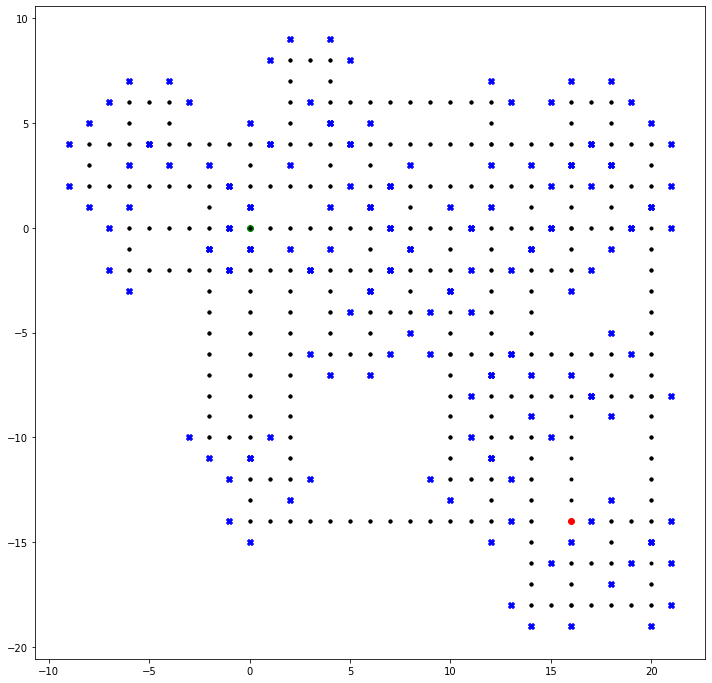

In [131]:
plt.figure(figsize=(12,12))
plt.scatter(0,0,marker='o',c='g')

for direction,x,y,status in list(big_results):
    if status == 0 :
        plt.scatter(x,y,marker = 'X',c='b')
    elif status == 1:
        plt.scatter(x,y,marker='.',c='k')
    elif status == 2:
        plt.scatter(x,y,marker='o',c='r')



In [76]:
list(machine.results)[0:10]

[(2, 4, 0, 1),
 (0, 6, -1, 1),
 (2, 3, 0, 1),
 (1, 0, 0, 0),
 (1, 6, -1, 1),
 (1, 6, -2, 1),
 (2, 6, 0, 1),
 (0, 6, 0, 1),
 (2, 5, 0, 1),
 (0, 0, 0, 0)]

In [94]:
list(machine.results)[-1]

(1, 10, -6, 1)

In [78]:
machine.walls

{(0, -1), (0, 1), (6, -3), (6, 1), (7, 0)}

In [64]:
import numpy as np
myresults = np.asarray(list(machine.results))

In [70]:
myresults

array([[ 2,  4,  0,  1],
       [ 0,  6, -1,  1],
       [ 2,  3,  0,  1],
       [ 1,  0,  0,  0],
       [ 1,  6, -1,  1],
       [ 1,  6, -2,  1],
       [ 2,  6,  0,  1],
       [ 0,  6,  0,  1],
       [ 2,  5,  0,  1],
       [ 0,  0,  0,  0],
       [ 2,  6,  0,  0],
       [ 0,  6,  0,  0],
       [ 2,  2,  0,  1],
       [ 2,  1,  0,  1],
       [ 1,  6, -2,  0]])

In [135]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)


In [148]:
tmp = np.asarray(list(machine.results)).T
print(min(tmp[1]),max(tmp[1]),abs(min(tmp[1]))+max(tmp[1])+1)
print(min(tmp[2]),max(tmp[2]),abs(min(tmp[2]))+max(tmp[2])+1)
min_x = min(tmp[1])
min_y = min(tmp[2])

-9 21 31
-19 9 29


In [160]:
start = (abs(min_x), +abs(min_y))
maze = np.ones((31,29))
for d,x,y,s in machine.results:
    if s==2:
        print('module found at:',x,y)
        end = (x+abs(min_x),y+abs(min_y))
    if s==1:
        maze[x+abs(min_x),y+abs(min_y)] = 0


print(start,end)

module found at: 16 -14
(9, 19) (25, 5)


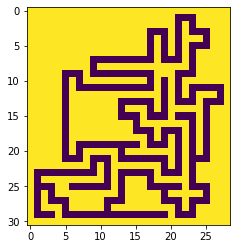

In [158]:
plt.imshow(maze)

In [161]:
print('Starting A* search')
path = astar(maze, start, end)
print(path)
print(len(path))

Starting A* search


KeyboardInterrupt: 

In [182]:
import sys
import itertools

#turn this into an iterator

class IntcodeMachine:
    VERBOSE=True
    def __init__(self, data,turn_dir=1):
        self.memory = data
        self.pointer = 0
        self.size = len(data)
        self.out = 0
        self.halt = False
        self.initialized = False
        self.relBase = 0
        
        self.painted_x = dict()
        self.painted_y = dict()
        self.current_pos = [0,0]
        self.facing = 0

        self.direction = 0
        self.ticker = 0
        self.paint_history = []
        self.colour = 1
        self.blocked = False
        self.results = set()
        self.direction = 1
        self.walls = set()
        self.runtime = 0
        self.turn_dir = turn_dir
        self.p = 0
    
    def process(self, inputArg = None):
        if inputArg != None:  
            self.initialized = True
        
        while self.pointer < self.size:
            opcode = int(str(self.memory[self.pointer])[-2:])
            paramModes = str(self.memory[self.pointer])[:-2]
            if self.halt:
                print('found 2!')
                break
            if self.runtime >100000:
                print('timedout after N')
                break
            if (opcode == 99): # HALT
                self.halt = True
                print('halt')
                break
            elif (opcode == 1): # OPCODE 01 - Sum
                self.__setParam(paramModes, 3, self.__getParam(paramModes,1) + self.__getParam(paramModes,2))
                self.pointer += 4
            elif (opcode == 2): # OPCODE 02 - Multiply
                self.__setParam(paramModes, 3, self.__getParam(paramModes,1) * self.__getParam(paramModes,2))
                self.pointer += 4
            elif (opcode == 3):  # OPCODE 03 - Input
                if inputArg != None:
                    self.__setParam(paramModes, 1, inputArg)
                    inputArg = None
                else:
                    if VERBOSE:

                        self.__setParam(paramModes, 1, self.direction)
                    else:
                        break
                self.pointer += 2
            elif (opcode == 4):  # OPCODE 04 - Print
                out = self.__getParam(paramModes,1)

                self.status=out
                
                self.make_moves()
                
                self.pointer += 2
            # Start of part 2
            elif (opcode == 5):  # OPCODE 05 - JNZ (jump if not zero)
                if (self.__getParam(paramModes,1) != 0):
                    self.pointer = self.__getParam(paramModes,2)
                else:
                    self.pointer += 3
            elif (opcode == 6):  # OPCODE 06 - JZ (jump if zero)
                if (self.__getParam(paramModes,1) == 0):
                    self.pointer = self.__getParam(paramModes,2)
                else:
                    self.pointer += 3
            elif (opcode == 7):  # OPCODE 07 - Set 1 if first is less than second else 0
                if (self.__getParam(paramModes,1) < self.__getParam(paramModes,2)):
                    self.__setParam(paramModes, 3, 1)
                else:
                    self.__setParam(paramModes, 3, 0)
                self.pointer += 4
            elif (opcode == 8):  # OPCODE 08 - Set 1 if first is equal to second else 0
                if (self.__getParam(paramModes,1) == self.__getParam(paramModes,2)):
                    self.__setParam(paramModes, 3, 1)
                else:
                    self.__setParam(paramModes, 3, 0)
                self.pointer += 4
            elif opcode == 9:
                self.relBase += self.__getParam(paramModes,1)
                self.pointer += 2
            else:
                print(str(self.memory[self.pointer]) + " Something went wrong :(")
                break

    def __getParam(self, paramModes, param):
        return self.memory[self.__getParamAddress(paramModes, param)]

    def __setParam(self, paramModes, param, value):
        self.memory[self.__getParamAddress(paramModes, param)] = value
    
    def __getParamAddress(self, paramModes, param):
        type = 0
        try:
            type = int(paramModes[-param])
        except:
            pass
        if type == 0:
            return self.memory[self.pointer + param]
        elif type == 1:
            return self.pointer + param
        elif type == 2:
            offset = self.memory[self.pointer + param]
            return self.relBase + offset
        else:
            print('Param type error')
            return 0
        
        
    def make_moves(self):
        self.runtime+=1
        #print(self.direction)
        compass = [1,4,2,3]
        turns = [-1j,1,1j,-1]
        #self.facing = 0
        #np = p + dp[d]

        if self.direction==1:
            dx=0
            dy=1
        elif self.direction ==3:
            dx=1
            dy=0
        elif self.direction ==2:
            dx=0
            dy=-1
        elif self.direction ==4:
            dx=-1
            dy=0

        
        if self.status == 1:
            self.current_pos = [self.current_pos[0]+dx, self.current_pos[1]+dy]
            self.results.add((self.direction,self.current_pos[0],self.current_pos[1],self.status))
            self.facing = (self.facing+self.turn_dir+6)%4

            
        elif self.status == 2:
            self.current_pos = [self.current_pos[0]+dx, self.current_pos[1]+dy]
            self.results.add((self.direction,self.current_pos[0],self.current_pos[1],self.status))
            self.halt = True
            
        elif self.status == 0 :
            self.results.add((self.direction,self.current_pos[0]+dx,self.current_pos[1]+dy,self.status))
            self.blocked = True
            self.walls.add((self.current_pos[0]+dx,self.current_pos[1]+dy))
            self.facing = (self.facing+self.turn_dir+4)%4
        
        self.direction = compass[self.facing]
        #print(self.direction)
                  
    
VERBOSE=True
data = list(map(lambda x: int(x), open('./input-15.txt', "r").read().split(','))) + [0 for i in range(10000)]
left_turn_machine = IntcodeMachine(data,turn_dir=1)
left_turn_machine.process()

data = list(map(lambda x: int(x), open('./input-15.txt', "r").read().split(','))) + [0 for i in range(10000)]
right_turn_machine = IntcodeMachine(data,turn_dir=-1)
right_turn_machine.process()



found 2!
found 2!


In [183]:
len(left_turn_machine.results) , len(right_turn_machine.results)

(597, 2597)

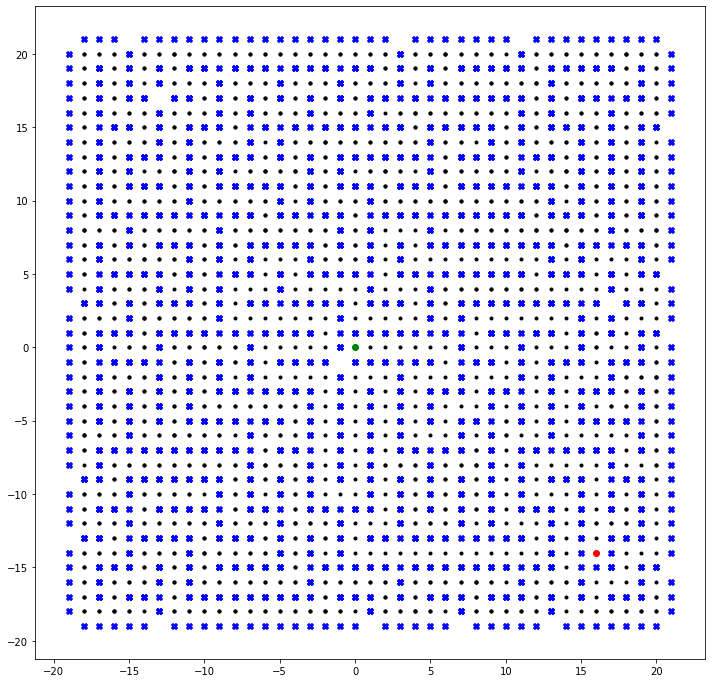

In [185]:
big_results = left_turn_machine.results.union(right_turn_machine.results)
#big_results = right_turn_machine.results


plt.figure(figsize=(12,12))
plt.scatter(0,0,marker='o',c='g')

for direction,x,y,status in list(big_results):
    if status == 0 :
        plt.scatter(x,y,marker = 'X',c='b')
    elif status == 1:
        plt.scatter(x,y,marker='.',c='k')
    elif status == 2:
        plt.scatter(x,y,marker='o',c='r')

        

In [ ]:
np.ones((-25,25))
for direction,x,y,status in list(big_results):



In [188]:
np.ones((50,50))

start = (25, 25)
maze = np.ones((50,50))*5
for d,x,y,s in big_results:
    if s==2:
        print('module found at:',x,y)
        end = (x+25,y+25)
    elif s==1:
        maze[x+25,y+25] = 0
    


print(start,end)

module found at: 16 -14
(25, 25) (41, 11)


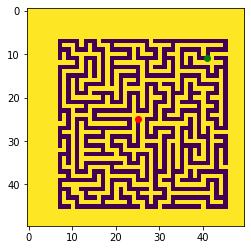

In [194]:
plt.imshow(maze)
plt.scatter(start[0],start[1],c='r')
plt.scatter(end[0],end[1],c='g')

In [196]:
print('Starting A* search')
path = astar(maze, start, end)
print(path)
print(len(path))

Starting A* search


KeyboardInterrupt: 

In [ ]:
scipy.ndimage.morphology.binary_dilation

module found at: 16 -14
(19, 19) (35, 5)


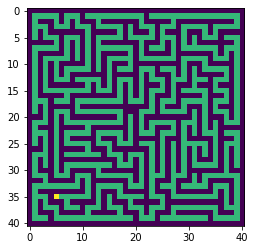

In [264]:
gridsize=41
midpint = 19
start = (midpint, midpint)
maze = np.ones((gridsize,gridsize))*-1
for d,x,y,s in big_results:
    if s==2:
        print('module found at:',x,y)
        end = (x+midpint,y+midpint)
        maze[x+midpint,y+midpint] = 2
    elif s==1:
        maze[x+midpint,y+midpint] = 1
    

print(start,end)
plt.imshow(maze)
#plt.scatter(start[0],start[1],c='r')
#plt.scatter(end[0],end[1],c='g')

In [265]:
import copy

guide = copy.deepcopy(maze)

In [266]:
from scipy.ndimage.morphology import binary_dilation
from scipy.ndimage import grey_dilation


In [267]:
(guide==1).sum()

797

In [268]:
tmp = maze
tmap = []
for i in range(0,500):
    tmp = np.ceil(grey_dilation(tmp,size=(3,3))*guide)
    tmap.append(tmp)
    if np.sum(tmp>1) == 797:
        print(i)
        break


274


In [241]:
np.ceil(grey_dilation(maze,size=(3,3))*guide)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
for n,t in enumerate(tmap):
    #plt.figure()
    plt.imshow(t>1)
    plt.savefig('./figs/'+str(n).zfill(3)+'.png')